In [1]:
# Numerical Python - For Matrix Calculation, Mathematical Operations, Statistical Operations
import numpy as np
# To read files of different format and for pre-processing
import pandas as pd
# Visulisation
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

In [2]:
insurance_data = pd.read_csv('insurance.csv')

In [3]:
insurance_data.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insurance_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [6]:
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()
insurance_data['sex'] = le_encoder.fit_transform(insurance_data['sex'])

In [7]:
le_encoder = LabelEncoder()
insurance_data['smoker'] = le_encoder.fit_transform(insurance_data['smoker'])

In [8]:
le_encoder = LabelEncoder()
insurance_data['region'] = le_encoder.fit_transform(insurance_data['region'])

In [9]:
insurance_data

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,0,27.900,0,1,3,16884.92400
1,1,18,1,33.770,1,0,2,1725.55230
2,2,28,1,33.000,3,0,2,4449.46200
3,3,33,1,22.705,0,0,1,21984.47061
4,4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,1,30.970,3,0,1,10600.54830
1334,1334,18,0,31.920,0,0,0,2205.98080
1335,1335,18,0,36.850,0,0,2,1629.83350
1336,1336,21,0,25.800,0,0,3,2007.94500


<Axes: xlabel='charges'>

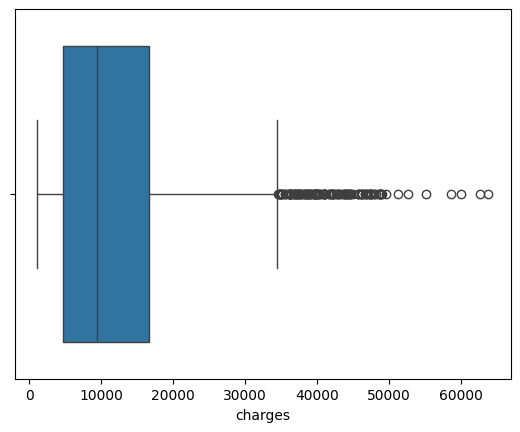

In [10]:
import seaborn as sns
sns.boxplot(insurance_data['charges'], orient = 'h')

In [11]:
from scipy.stats import zscore
z = np.abs(zscore(insurance_data['charges']))

In [12]:
insurance_data.drop(np.where(z>3)[0], inplace=True)

In [13]:
X = insurance_data.drop(['charges'], axis = 1)
Y = insurance_data['charges']

Train and Test Data

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 3)

ANN Regression Model

In [15]:
def build_model():
  model = Sequential()
  # Input Layer
  model.add(Dense(units =  128, activation = 'relu', input_shape = [len(X.keys())]))
  # Hidden Layer - I
  model.add(Dense(units =  256, activation = 'relu'))
  # Hidden Layer - II
  model.add(Dense(units =  512, activation = 'relu'))
  # Output Layer
  model.add(Dense(units =1))
  # Optimizer
  model.compile(loss = 'mean_squared_error',optimizer = 'RMSprop', metrics = ['mean_squared_error', 'mean_absolute_error'])
  return model

In [16]:
model = build_model()

In [17]:
history = model.fit(x_train, y_train, epochs = 1000, batch_size = 30, validation_split = 0.2)

Epoch 1/1000


29/29 [==============================] - 3s 30ms/step - loss: 212871232.0000 - mean_squared_error: 212871232.0000 - mean_absolute_error: 10203.5371 - val_loss: 140071456.0000 - val_mean_squared_error: 140071456.0000 - val_mean_absolute_error: 9133.7842
Epoch 2/1000
29/29 [==============================] - 0s 7ms/step - loss: 182555056.0000 - mean_squared_error: 182555056.0000 - mean_absolute_error: 9642.7900 - val_loss: 124386880.0000 - val_mean_squared_error: 124386880.0000 - val_mean_absolute_error: 8223.8184
Epoch 3/1000
29/29 [==============================] - 0s 7ms/step - loss: 171506352.0000 - mean_squared_error: 171506352.0000 - mean_absolute_error: 9312.1367 - val_loss: 118425640.0000 - val_mean_squared_error: 118425640.0000 - val_mean_absolute_error: 7325.1782
Epoch 4/1000
29/29 [==============================] - 0s 7ms/step - loss: 154697216.0000 - mean_squared_error: 154697216.0000 - mean_absolute_error: 8739.0859 - val_loss: 105705992.0000 - val_mean_squared

<Axes: >

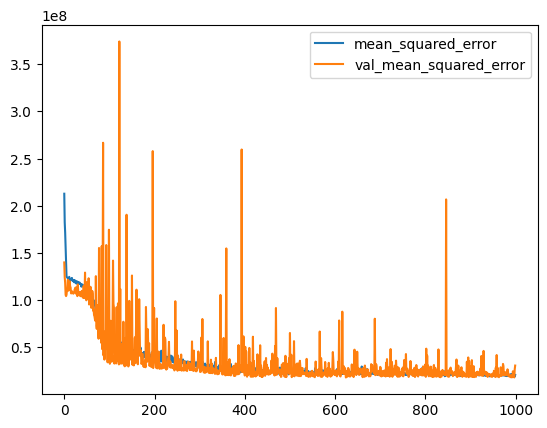

In [18]:
pd.DataFrame(history.history)[['mean_squared_error','val_mean_squared_error']].plot()

In [19]:
yhat = model.predict(x_test)

9/9 [==============================] - 0s 3ms/step


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.7523665757683234

In [21]:
results = pd.DataFrame(yhat, columns = ['Predicted_Value'])

In [22]:
results['Actual_Value'] = np.array(y_test)

<Axes: >

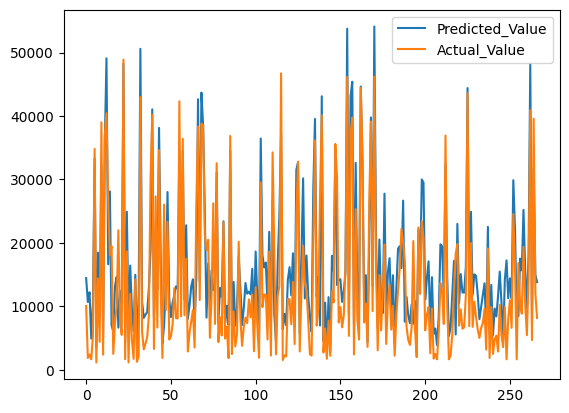

In [23]:
results.plot()